In [2]:
#1. Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
#2. Hãy tải dữ liệu từ file drug200.csv lưu vào data frame df
df = pd.read_csv('drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#3. Kiểm tra thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
#4. Mô tả dữ liệu
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
#5. Kiểm tra kiểu dữ liệu
print(df.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [7]:
#6. Kiểm tra tên cột, dùng columns
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
#7. Kiểm tra dữ liệu trống
df.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
#8. Kiểm tra dữ liệu trùng
df.duplicated().sum()

0

In [10]:
# 9. Đổi tên cột phù hợp ngữ nghĩa

df.rename(columns={'Na_to_K': 'Sodium_To_Potassium', 'BP': 'Blood_Pressure'}, inplace=True)
df['Sex'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
df['Sodium_To_Potassium'] = df['Sodium_To_Potassium'].round(0)
df['Sodium_To_Potassium'] = df['Sodium_To_Potassium'].astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\2216899231.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)


In [11]:
#10. Thống kê số lượng người thuộc 5 nhóm tuổi cao nhất

age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age': top_age.index, 'Count': top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,39,6


C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\147853294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\147853294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\147853294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\147853294.py:6: FutureWarning: 

Pa

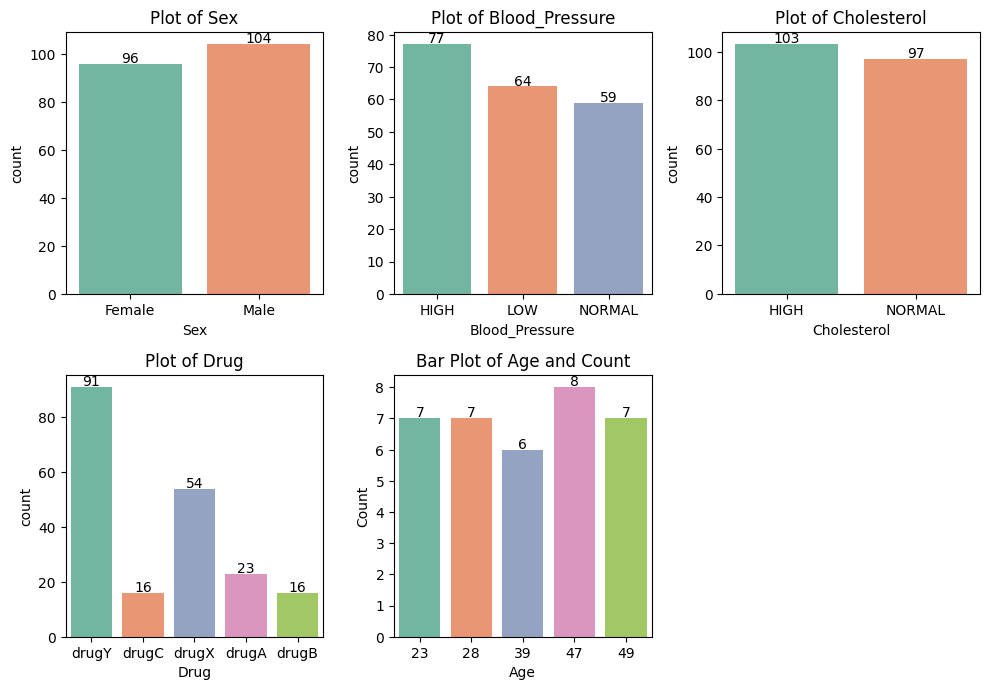

In [12]:
# 11. Tiến hành EDA dữ liệu. Sinh viên quan sát các biểu đồ và cho nhận xét

# EDA
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline',
        fontsize=10, color='black',
        xytext=(0, 1),
        textcoords='offset points')

# Create the figure and subplots
plt.figure(figsize=(10, 10))

# Define plot configurations
plot_configs = [
{'x': 'Sex', 'data': df, 'plot_type': 'count'},
{'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
{'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
{'x': 'Drug', 'data': df, 'plot_type': 'count'},
{'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'}
]

# Loop through plot configurations to create subplots
for i, config in enumerate (plot_configs):
    ax = plt.subplot(3, 3, i + 1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

# Nhận xét
# có nhiều nam hơn nữ trong tập dữ liệu này
# Số người có huyết áp cao nhiều hơn so với người có huyết áp thấp và bình thường.
# Số người có cholesteron cao nhiều hơn so với người có cholesteron bình thường.
# DrugY là loại thuốc được sử dụng phổ biến nhất, drugB và drugC là 2 loại ít được sử dụng nhất
# Các nhóm tuổi phân bố khá đồng đều

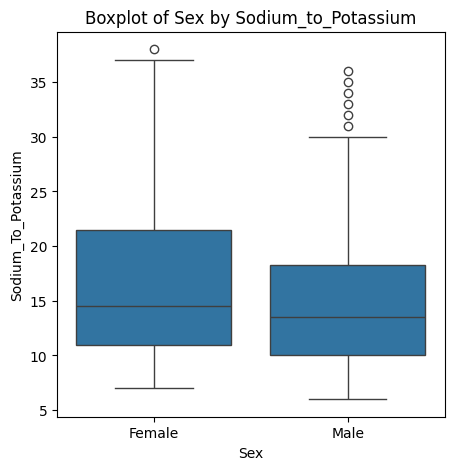

In [13]:
# 12. Tiến hành khảo sát dữ liệu outlier và cho nhận xét

plt.figure(figsize=(5,5))
sns.boxplot(x='Sex', y='Sodium_To_Potassium', data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()

# Nhận xét
# Tỉ lệ sodium / potassium của nhóm nữ cáo hơn và có phân bố rộng hơn nhóm nam.
# Nhóm nam có nhiều giá trị ngoại lai hơn

In [14]:
#13. Tạo tập dữ liệu đặc trưng (feature) và mục tiêu (target)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f'{X}{y}')

     Age     Sex Blood_Pressure Cholesterol  Sodium_To_Potassium
0     23  Female           HIGH        HIGH                   25
1     47    Male            LOW        HIGH                   13
2     47    Male            LOW        HIGH                   10
3     28  Female         NORMAL        HIGH                    8
4     61  Female            LOW        HIGH                   18
..   ...     ...            ...         ...                  ...
195   56  Female            LOW        HIGH                   12
196   16    Male            LOW        HIGH                   12
197   52    Male         NORMAL        HIGH                   10
198   23    Male         NORMAL      NORMAL                   14
199   40  Female            LOW      NORMAL                   11

[200 rows x 5 columns]0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


In [15]:
#14. Tiến hành One Hot Encoder cho đặc trưng Sex và Label Encoder cho các categorical feature còn 
#lại. Sinh viên giải thích tại sao làm như vậy?

#One hot encoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
X = pd.concat([X, onehot_df], axis=1)
X = X.drop('Sex', axis=1) #drop the categorical columns

#labelled encoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()

X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_blood_pressure.fit_transform(X['Cholesterol'])

# Sử dụng one hot encoder cho giới tính vì one hot encoder thích hợp hơn cho các biến phân loại
# không có tính thứ tự, trong trường hợp này, giới tính male không có nghĩa là lớn hơn female 
# hoặc ngược lại

# Sử dụng label encoder cho các biến còn lại gì các giá trị ở các biến còn lại mang tính phân loại 
# theo thứ tự, ở đây là Blood_pressure và cholesteron đều có các giá trị HIGH > NORMAL > LOW

In [16]:
# 15. Sinh viên phân tách thành tập dữ liệu train và test với tỉ lệ 60:40 , hệ số ngẫu nhiên là 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
# 16. Xây dựng mô hình với các hyperparameter tunning (siêu tham số điều chỉnh mô hình) như sau: 
# criterion=”entropy”, max_depth=6 và lamx_leaf_nodes=10. Sinh viên giải thích các siêu tham số

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

# các siêu tham số
# entropy: đo mức tinh khiết của tập dữ liệu, càng thấp thì càng dễ quyết định
# max depth: độ sâu của cây. Giới hạn độ sâu để hạn chế học quá kĩ
# max leaf nodes: số lá nhiều nhất mà cây có thể có. Giới hạn nút lá để tránh việc học quá kĩ

In [18]:
# 17. Tiến hành huấn luyện (train) mô hình trên tập dữ liệu huấn luyện

dtc = dtc.fit(X_train, y_train)

In [19]:
# 18. Hiện thị danh sách các lớp mục tiêu phân lớp
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

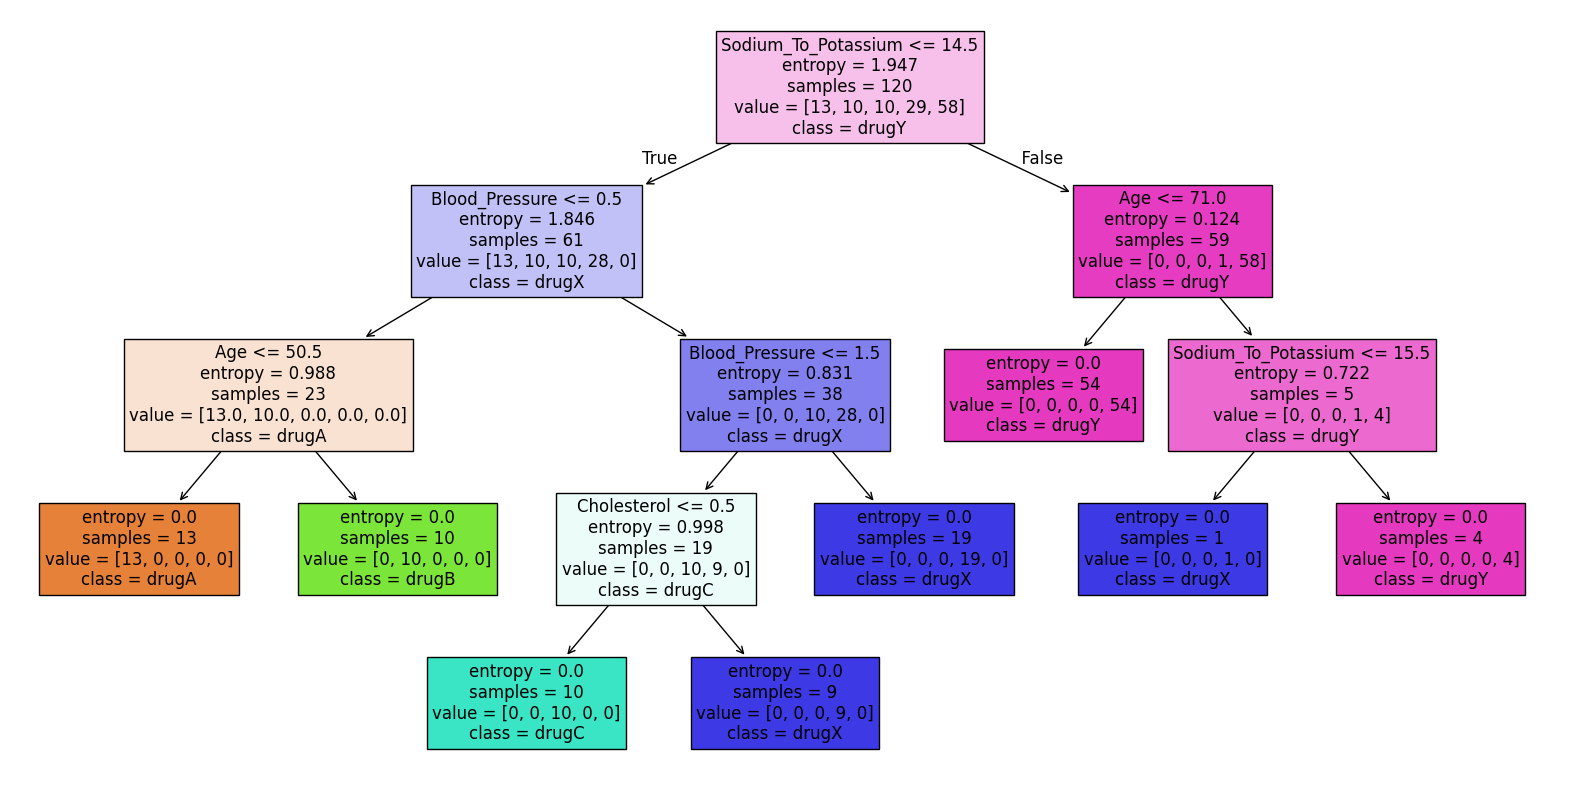

In [20]:
# 19. Vẽ sơ đồ mô hình cây phân lớp. Sinh viên giải thích các số liệu trên từng node và leaf
from sklearn.tree import plot_tree

features_col = X_train.columns

plt.figure(figsize=(20, 10))
plot_tree(dtc, class_names=dtc.classes_, feature_names=features_col, fontsize=12, filled=True)
plt.show()

# entropy: mức độ tinh khiết của dữ liệu
# samples: số lượng mẫu trong tập dữ liệu thỏa điều kiện
# values: tập target với số lượng theo thứ tự tương ứng như sau ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
# class: kết luận đưa ra

In [21]:
# 20. Tính Entropy có trọng số (WE) và Information Gain khi phân tách Root thành Left – Right node
# Entropy root = 1.947
# n = 120

# Left 
# Entropy = 1.846
# n = 61

# Right 
# Entropy = 0.124
# n = 59

# WE = 1.846 * 61 / 120 + 0.124 * 59 / 120 = 0.99
# IG = 1.947 - 0.99 = 0,957

In [22]:
# 21. Sinh viên tiến hành đánh giá dựa trên các độ đo
y_pred = dtc.predict(X_test)

# a. Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'accuracy score: {accuracy_score(y_test, y_pred)}', end='\n')

# b. Confusion matrix
cfmx = confusion_matrix(y_test, y_pred)
print(f'cfmx: {cfmx}')

accuracy score: 0.9875
cfmx: [[10  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  1 32]]


In [23]:
# 22. In ra bảng báo cáo các giá trị đánh giá theo từng nhóm thuốc phân lớp
from sklearn.metrics import classification_report
target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [24]:
# 23. Xây dựng chương trình đề xuất hỗ trợ cấp thuốc cho bệnh nhân dựa trên các chỉ số Age, 
# Blood_Pressure, Cholesterol, Sodium_to_Potassium và Sex được nhập từ bàn phím. Hãy in ra kết 
# quả loại thuốc được cấp. Ví dụ: Age=32, Blood_Pressure=’HIGH’, Cholesterol=’NORMAL’, 
# Sodium_to_Potassium=13, Sex=’Female’

age = input('Nhập age')
Blood_Pressure = input('Nhập Blood_Pressure')
Cholesterol = input('Nhập Cholesterol')
Sodium_To_Potassium = input('Nhập Sodium_to_Potassium')
Sex = input('Nhập Sex')

list = []
list.append([age, Sex, Blood_Pressure, Cholesterol, Sodium_To_Potassium])
columns = ['Age', 'Sex', 'Blood_Pressure', 'Cholesterol', 'Sodium_To_Potassium']
df_test = pd.DataFrame(list, columns=columns)

df_test['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(df_test['Blood_Pressure'])
df_test['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(df_test['Cholesterol'])

onehot_encoded = onehot_encoder_sex.fit_transform(df_test[['Sex']])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
df_test = pd.concat([df_test, onehot_df], axis=1)
df_test = df_test.drop('Sex', axis=1)
df_test['Sex_Male'] = 1 - df_test['Sex_Female']

result_pred = dtc.predict(df_test)
print(result_pred)



['drugA']


In [27]:
# 24. Sinh viên điều chỉnh các siêu tham số trong mô hình như sau: max_depth chạy từ 2 đến 10 và 
# max_leaf_nodes chạy từ 2 đến 10. Sau đó, vẽ biểu đồ thể hiện sự thay đổi của độ đo accuracy. Từ
# đó đưa đến kết luận với siêu tham số điều chỉnh nào thì mô hình tốt nhất
test_result = []
for max_depth in range(2, 10):
    for max_leaf_nodes in range(2, 10):
        dtc = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, max_leaf_nodes=max_leaf_nodes)
        dtc = dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        test_result.append({max_depth, max_leaf_nodes, accuracy_score(y_test, y_pred)})

print(test_result)

TypeError: 'set' object is not subscriptable